In [1]:
%load_ext autoreload
%autoreload 2

# Example for the WindRose module

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from windrose import Windrose


## Minimal example

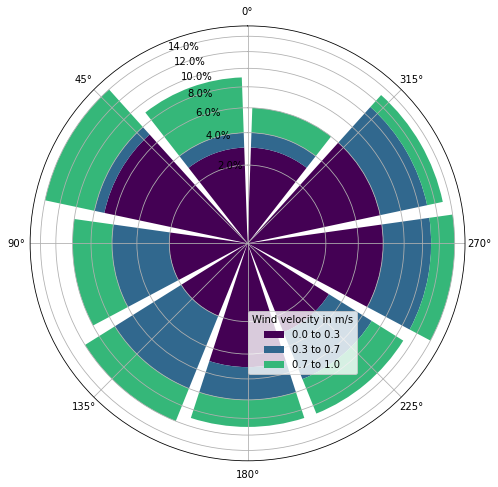

In [32]:
N = 9
n_samples = 100

rng = np.random.default_rng(seed=42)
theta = rng.random(n_samples) * 2 * np.pi
width = 2 * np.pi / N
radii = rng.random(n_samples)

fig = plt.figure(figsize=(8, 8))
Windrose(radii, theta, n_bins_r=3, n_bins_theta=N, fig=fig)
# plt.legend()

## Comparison between the classical windrose and this design

In [14]:
# Create example data
rng = np.random.default_rng(1)
wind_velocity_1 = rng.normal(loc=np.repeat(2, 100)) ** 2
wind_velocity_2 = rng.normal(loc=np.repeat(2, 100)) ** 2
wind_direction_1 = rng.normal(loc=np.repeat(1, 100), scale=0.5)
wind_direction_2 = rng.normal(loc=np.repeat(1, 100), scale=1.0)

n_bins_r = 5
n_bins_theta = 16


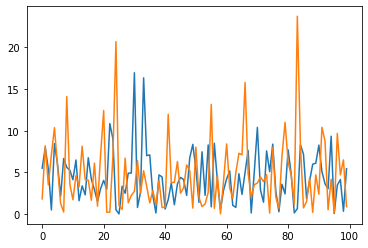

In [9]:
plt.plot(wind_velocity_1)
plt.plot(wind_velocity_2)


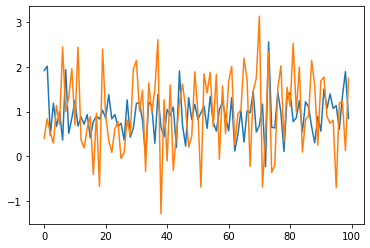

In [10]:
plt.plot(wind_direction_1)
plt.plot(wind_direction_2)


In [11]:
#
class NormalWindrose:
    def __init__(self, r, theta, n_bins_r, n_bins_theta, fig, subplot_id=None):
        # Init polar ax
        ax = fig.add_subplot(subplot_id, projection="polar")
        ax.set_theta_offset(np.pi / 2)
        # ax.set_rlabel_position(180 - 22.5)

        theta_width = 2 * np.pi / n_bins_theta
        theta_mid_points = (np.arange(n_bins_theta) + 0.5) / n_bins_theta * 2 * np.pi

        values = np.zeros((n_bins_theta, n_bins_r))

        for i, theta_mid_point in enumerate(theta_mid_points):
            theta_min = theta_mid_point - theta_width / 2
            theta_max = theta_mid_point + theta_width / 2
            index = (theta % (2 * np.pi) >= theta_min) & (
                theta % (2 * np.pi) < theta_max
            )
            r_hist, r_bin_edges = np.histogram(
                r[index], bins=n_bins_r, range=(r.min(), r.max())
            )
            values[i] = r_hist

        # Scale values to percent
        values = values / len(r) * 100

        bottom = np.zeros(n_bins_theta)
        scaling_factor = 0.9
        for i in range(n_bins_r):
            color = plt.cm.viridis(np.repeat(i / n_bins_r, n_bins_theta))
            ax.bar(
                theta_mid_points,
                values[:, i],
                width=theta_width * scaling_factor,
                bottom=bottom,
                color=color,
                label="{:.1f} to {:.1f}".format(r_bin_edges[i], r_bin_edges[i + 1]),
            )
            bottom += values[:, i]

        plt.legend(loc=(0.5, 0.2), title="Wind velocity in m/s")
        # Fixed formatter (not preferred)
        # ticks = ax.get_yticks()
        # ax.set_yticklabels(["{}%".format(int(i)) for i in ticks])

        # Flexible formatter
        ax.yaxis.set_major_formatter("{x}%")


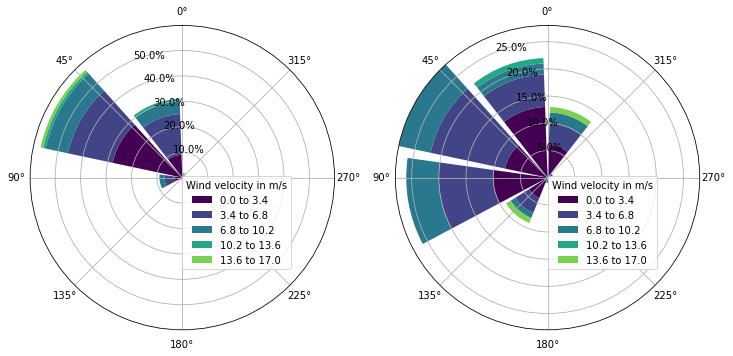

In [12]:
fig = plt.figure(figsize=(12, 6))
NormalWindrose(wind_velocity_1, wind_direction_1, n_bins_r, n_bins_theta, fig, 121)
ax1 = plt.gca()
NormalWindrose(wind_velocity_1, wind_direction_2, n_bins_r, n_bins_theta, fig, 122)
ax2 = plt.gca()
# ax2.set_ylim(*ax1.get_ylim())
fig.show()


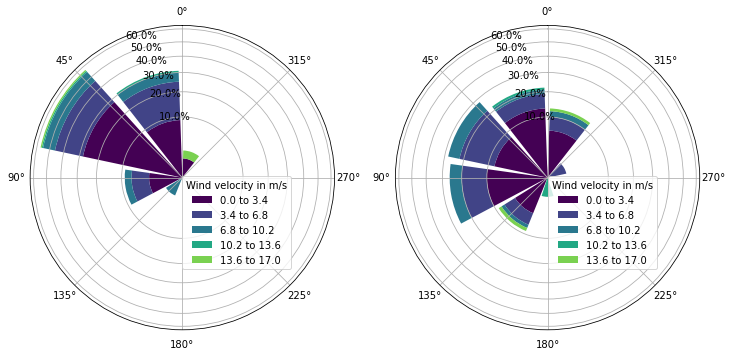

In [13]:
fig = plt.figure(figsize=(12, 6))
Windrose(wind_velocity_1, wind_direction_1, n_bins_r, n_bins_theta, fig, 121)
ax1 = plt.gca()
Windrose(wind_velocity_1, wind_direction_2, n_bins_r, n_bins_theta, fig, 122)
ax2 = plt.gca()
ax2.set_ylim(*ax1.get_ylim())
fig.show()
